<a href="https://colab.research.google.com/github/larissa-rangel/IA376/blob/main/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nome: Larissa Rangel de Azevedo
## RA: 247008

### Attr2Font

* Github: https://github.com/hologerry/Attr2Font
* Dataset: https://drive.google.com/file/d/1TTqAklfsAp6KOPxCVl2jktH8kN4lEmI_/view

### Pacotes

In [ ]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets,transforms
from torchvision.utils import save_image
from tqdm.notebook import tqdm
import os
import shutil
import random
random.seed(5)
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
# Dataset Attr2font

### Google Drive

In [ ]:
# Conexão com o google drive, se achar necessário
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Dados:

In [ ]:
# Baixando os dados do Attr2font que podem ser encontrados em:
!gdown --id 1TTqAklfsAp6KOPxCVl2jktH8kN4lEmI_
!unzip ../content/explor_all.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: explor_all/image/DroidSerif-Bold/46.png  
  inflating: explor_all/image/DroidSerif-Bold/05.png  
  inflating: explor_all/image/DroidSerif-Bold/03.png  
  inflating: explor_all/image/DroidSerif-Bold/37.png  
  inflating: explor_all/image/DroidSerif-Bold/15.png  
  inflating: explor_all/image/DroidSerif-Bold/29.png  
  inflating: explor_all/image/DroidSerif-Bold/19.png  
  inflating: explor_all/image/DroidSerif-Bold/39.png  
  inflating: explor_all/image/DroidSerif-Bold/56.png  
  inflating: explor_all/image/DroidSerif-Bold/58.png  
  inflating: explor_all/image/DroidSerif-Bold/42.png  
  inflating: explor_all/image/DroidSerif-Bold/38.png  
 extracting: explor_all/image/DroidSerif-Bold/52.png  
  inflating: explor_all/image/DroidSerif-Bold/34.png  
  inflating: explor_all/image/DroidSerif-Bold/61.png  
  inflating: explor_all/image/DroidSerif-Bold/48.png  
  inflating: explor_all/image/DroidSerif-Bold/53.png  
  infl

In [ ]:
# Cria os diretórios de interesse:
!mkdir data
!mkdir results
!mkdir models
!mv ../content/explor_all/image ../content/data/Fonts
!rm -rf ../content/explor_all

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘results’: File exists
mkdir: cannot create directory ‘models’: File exists


In [ ]:
epochs=5
batch_size=64
torch.manual_seed(17)

In [ ]:
#visualizar as imagens
def show_img(img):
    img = img.permute(1, 2, 0)
    if img.shape[2]==1:
        img = img.view(img.shape[0], img.shape[1])
    plt.title(f'Image has size {img.cpu().numpy().shape}')
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
#cria dentro da pasta 'data' em duas pastas com dados de treino e validação
path='../content/data/Fonts'
train_path = '../content/data/trainFonts'
val_path = '../content/data/valFonts'

In [ ]:
# Compõe diversas transformações juntas: a primeira está mudando as imagens para  níveis de cinza de 0 a 255 para garantir que todas tenham apenas 1 canal,
# depois está sendo feito um redimensionamento da imagem para um tamanho 50x50 pixels e
# por último coonverte a imagem em um tensor
transforms_all = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(size=50),
    transforms.ToTensor()
])
# Dummy batch é um dataloader criado para carregar o conjunto de dados das imagens, direto da pasta 'path'. Com o batch size=1 as imagens são carregadas uma de cada vez
dummy_batch = torch.utils.data.DataLoader(
    datasets.ImageFolder(path,transform=transforms.ToTensor()),
    batch_size=1, shuffle=True
)

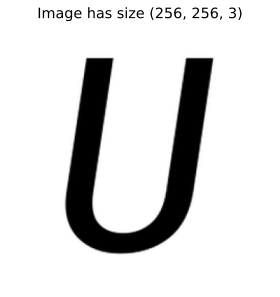

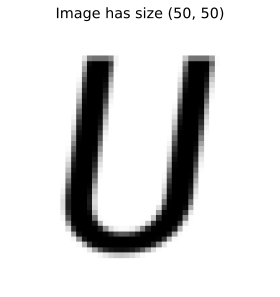

In [ ]:
#Mostra a imagem original Vs. a imagem transformada. Pode-se observar que a imagem transformada ficou um pouco pixelada, porém ela só possui 1 canal.
for batch in dummy_batch:
  original_image=batch[0][0]
  show_img(original_image)
  show_img(transforms_all(transforms.ToPILImage()(original_image)))
  break

### Separação em dados de treino e validação

In [ ]:
folders=os.listdir(path)
print(len(folders))

# shutil.rmtree('/content/drive/MyDrive/Corpora/trainFonts')
# shutil.rmtree('/content/drive/MyDrive/Corpora/valFonts')

# A função os.mkdir cria um diretório nomeado pelo 'path' dado no argumento entre parêntese.
#Este método gera FileExistsError se o diretório a ser criado já existir

os.mkdir(train_path) #'../content/data/trainFonts'
os.mkdir(val_path)   #'../content/data/valFonts'


# Podemos limitar em num_folders a quantidade total de pasta que iremos trabalhar, no total temos 1116.
num_folders = 134
count_folders = 1
for folder in tqdm(folders):
    if count_folders <= num_folders:
      print(folder)
      os.mkdir(f'{train_path}/{folder}')
      os.mkdir(f'{val_path}/{folder}')
      images = os.listdir(f'{path}/{folder}')
      random.shuffle(images)
      for image in images[:20]:
        shutil.copy(f'{path}/{folder}/{image}',
                  f'{val_path}/{folder}/{image}')
      for image in images[20:]:
        shutil.copy(f'{path}/{folder}/{image}',
                  f'{train_path}/{folder}/{image}')
    count_folders += 1

1116


  0%|          | 0/1116 [00:00<?, ?it/s]

Nobile-Regular
MateSC-Regular
GermaniaOne-Regular
Lato-Black
Prata-Regular
Exo-SemiBold
Oswald-Light
Tuffy-BoldItalic
Lobster
Petrona-Regular
AdventPro-Medium
Lekton-Regular
Flamenco-Regular
Cabin-SemiBold
CrimsonText-Roman
Paprika-Regular
Puritan-Italic
Marcellus-Regular
SquadaOne-Regular
Chivo-Regular
Andika-R
GFSNeohellenicItalic
Lemon-Regular
ExpletusSans-Italic
LuckiestGuy
Bangers
Nunito-Light
Amaranth-BoldItalic
Gudea-Bold
Roboto-BlackItalic
EmblemaOne-Regular
CodaCaption-Heavy
Raleway-Heavy
Marvel-Regular
Junge-Regular
Quicksand-LightItalic
Cutive-Regular
McLaren-Regular
Magra-Regular
TheGirlNextDoor
ABeeZee-Italic
Courgette-Regular
Stalemate-Regular
AveriaLibre-LightItalic
Roboto-Light
UbuntuMono-Italic
AlexBrush-Regular
Enriqueta-Bold
AdventPro-SemiBold
Dosis-ExtraLight
ProstoOne-Regular
CaesarDressing-Regular
Offside-Regular
MarckScript-Regular
LovedbytheKing
NanumGothic-Bold
HerrVonMuellerhoff-Regular
Pecita
Unkempt-Bold
Ranchers-Regular
Cousine-Regular
Nosifer-Regular
Judso

In [ ]:
#os.listdir() é usado para listar todos os arquivos e diretórios em uma pasta específica.
# Neste caso esta printando a quantidade de fontes
print(len(os.listdir(train_path)))
print(len(os.listdir(val_path)))

134
134


### Construção do Dataset e Dataloader

In [ ]:
transforms_set = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(size=50),
    transforms.ToTensor()
])

train_loader=torch.utils.data.DataLoader(
    datasets.ImageFolder(f'{train_path}',transform=transforms_set),
    batch_size=batch_size, shuffle=True
)

val_loader=torch.utils.data.DataLoader(
    datasets.ImageFolder(f'{val_path}',transform=transforms_set),
    batch_size=batch_size, shuffle=True
)

### Implementação VAE

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()


        z = 32 # Dimensão do espaço latente

        #ENCODER
        self.fc1 = nn.Linear(50*50,1000) # Entra imagem 50x50, sai um vetor de 1000 elementos
        self.fc21 = nn.Linear(1000,z)   # Mean - Entra vetor de 1000 elementos, sai um vetor de 32
        self.fc22 = nn.Linear(1000,z)   # Variance - Entra vetor de 1000 elementos sai um vetor de 32

        #DECODER
        self.fc2 = nn.Linear(z,1000) # Acrescentando mais uma camada linear
        self.fc3 = nn.Linear(z,1000)
        self.fc4 = nn.Linear(1000,50*50)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):

        # don't forget forward pass re-index

        mu, logvar = self.encode(x.view(-1, 50*50))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

### Implementação Loss Function

In [ ]:
def loss_function(recon_x, x, mu, logvar):

    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 50*50), reduction='sum')

    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

### Criação do Modelo

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=VAE().to(device)
print('Device: ',device)
model=VAE().to(device)
optimizer=optim.Adam(model.parameters(),lr=1e-3)

Device:  cpu


### Loops de Treinamento e Avaliação

In [ ]:
def evaluate(evaluate_data=val_loader):


    val_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(evaluate_data):

            data=data.to(device)
            recon_batch,mu,logvar=model(data)
            val_loss += loss_function(recon_batch,data,mu,logvar).item()


            if i == 0:
                n = min(data.size(0), 16)
                comparison = torch.cat([data[:n],
                                        recon_batch.view(batch_size, 1, 50, 50)[:n]])
                save_image(comparison.cpu(),
                           '../content/results/reconstruction_' + str(epoch) + '.pdf', nrow=n)

    val_loss /= len(evaluate_data.dataset)
    return val_loss


def sample_latent_space(epoch):
    with torch.no_grad():

        # how to sample from our latent space
        sample=torch.randn(64,32).to(device) #Retorna um tensor (X,Y) preenchido com números aleatórios de uma distribuição normal padrão
        sample=model.decode(sample).cpu()

        save_image(sample.view(64, 1, 50, 50),
                   '../content/results/sample_' + str(epoch) + '.pdf')

In [ ]:
def train(epoch):

    model.train()
    train_loss = 0

    progress_bar = tqdm(train_loader, desc='Epoch {:03d}'.format(epoch), leave=False, disable=False)
    for data, _ in progress_bar:

        data=data.to(device)
        optimizer.zero_grad()
        recon_batch,mu,logvar=model(data)

        loss=loss_function(recon_batch,data,mu,logvar)
        loss.backward()
        train_loss+=loss.item()
        optimizer.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(data))})

    average_train_loss = train_loss / len(train_loader.dataset)
    tqdm.write('Training set loss (average, epoch {:03d}): {:.3f}'.format(epoch, average_train_loss))
    val_loss = evaluate(val_loader)
    tqdm.write('\t\t\t\t====> Validation set loss: {:.3f}'.format(val_loss))

    train_losses.append(average_train_loss)
    val_losses.append(val_loss)

    if epoch%300==0:
        torch.save(model.state_dict(), f'../content/models/epoch_{epoch}_Z_32_3camadas_decoder.model')

### Treinamento

In [ ]:
epochs = 300

train_losses,val_losses=[],[]

for epoch in range(1,epochs+1):
  train(epoch)
  sample_latent_space(epoch)


np.savetxt('../content/models/training_losses_Z_32_3camadas_decoder.txt', np.array(train_losses), delimiter='\n')
np.savetxt('../content/models/validation_losses_Z_32_3camadas_decoder.txt', np.array(val_losses), delimiter='\n')


Epoch 001:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 001): 214.249
				====> Validation set loss: 267.583


Epoch 002:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 002): 213.479
				====> Validation set loss: 269.080


Epoch 003:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 003): 213.344
				====> Validation set loss: 267.624


Epoch 004:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 004): 214.310
				====> Validation set loss: 269.429


Epoch 005:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 005): 214.175
				====> Validation set loss: 272.528


Epoch 006:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 006): 214.550
				====> Validation set loss: 270.323


Epoch 007:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 007): 214.656
				====> Validation set loss: 270.031


Epoch 008:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 008): 214.903
				====> Validation set loss: 268.196


Epoch 009:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 009): 214.076
				====> Validation set loss: 269.458


Epoch 010:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 010): 215.067
				====> Validation set loss: 270.334


Epoch 011:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 011): 213.648
				====> Validation set loss: 267.015


Epoch 012:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 012): 213.386
				====> Validation set loss: 267.647


Epoch 013:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 013): 213.191
				====> Validation set loss: 268.938


Epoch 014:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 014): 213.687
				====> Validation set loss: 267.324


Epoch 015:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 015): 214.845
				====> Validation set loss: 272.355


Epoch 016:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 016): 214.030
				====> Validation set loss: 272.603


Epoch 017:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 017): 213.584
				====> Validation set loss: 269.660


Epoch 018:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 018): 213.430
				====> Validation set loss: 271.572


Epoch 019:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 019): 214.027
				====> Validation set loss: 270.789


Epoch 020:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 020): 213.019
				====> Validation set loss: 268.291


Epoch 021:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 021): 214.075
				====> Validation set loss: 268.726


Epoch 022:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 022): 213.342
				====> Validation set loss: 269.016


Epoch 023:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 023): 212.732
				====> Validation set loss: 273.817


Epoch 024:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 024): 213.119
				====> Validation set loss: 271.516


Epoch 025:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 025): 212.689
				====> Validation set loss: 269.515


Epoch 026:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 026): 214.219
				====> Validation set loss: 269.854


Epoch 027:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 027): 212.603
				====> Validation set loss: 271.072


Epoch 028:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 028): 212.050
				====> Validation set loss: 269.287


Epoch 029:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 029): 212.384
				====> Validation set loss: 269.669


Epoch 030:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 030): 212.735
				====> Validation set loss: 270.069


Epoch 031:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 031): 213.224
				====> Validation set loss: 271.903


Epoch 032:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 032): 213.079
				====> Validation set loss: 270.037


Epoch 033:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 033): 213.514
				====> Validation set loss: 270.581


Epoch 034:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 034): 213.134
				====> Validation set loss: 271.051


Epoch 035:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 035): 213.091
				====> Validation set loss: 268.985


Epoch 036:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 036): 212.763
				====> Validation set loss: 268.690


Epoch 037:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 037): 212.752
				====> Validation set loss: 270.373


Epoch 038:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 038): 213.478
				====> Validation set loss: 272.896


Epoch 039:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 039): 213.348
				====> Validation set loss: 273.161


Epoch 040:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 040): 211.953
				====> Validation set loss: 270.804


Epoch 041:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 041): 212.246
				====> Validation set loss: 270.516


Epoch 042:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 042): 212.497
				====> Validation set loss: 272.129


Epoch 043:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 043): 211.943
				====> Validation set loss: 269.592


Epoch 044:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 044): 212.809
				====> Validation set loss: 271.835


Epoch 045:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 045): 212.953
				====> Validation set loss: 269.550


Epoch 046:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 046): 212.071
				====> Validation set loss: 270.108


Epoch 047:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 047): 212.442
				====> Validation set loss: 271.701


Epoch 048:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 048): 211.873
				====> Validation set loss: 269.283


Epoch 049:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 049): 211.800
				====> Validation set loss: 269.727


Epoch 050:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 050): 212.488
				====> Validation set loss: 274.046


Epoch 051:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 051): 212.571
				====> Validation set loss: 273.536


Epoch 052:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 052): 212.483
				====> Validation set loss: 268.558


Epoch 053:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 053): 211.608
				====> Validation set loss: 270.267


Epoch 054:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 054): 212.306
				====> Validation set loss: 272.501


Epoch 055:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 055): 212.328
				====> Validation set loss: 272.229


Epoch 056:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 056): 212.487
				====> Validation set loss: 274.207


Epoch 057:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 057): 211.970
				====> Validation set loss: 273.003


Epoch 058:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 058): 212.904
				====> Validation set loss: 269.743


Epoch 059:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 059): 212.442
				====> Validation set loss: 271.410


Epoch 060:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 060): 211.209
				====> Validation set loss: 269.994


Epoch 061:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 061): 211.471
				====> Validation set loss: 270.214


Epoch 062:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 062): 211.277
				====> Validation set loss: 270.245


Epoch 063:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 063): 211.467
				====> Validation set loss: 270.369


Epoch 064:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 064): 211.152
				====> Validation set loss: 270.843


Epoch 065:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 065): 211.625
				====> Validation set loss: 270.421


Epoch 066:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 066): 211.467
				====> Validation set loss: 275.532


Epoch 067:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 067): 211.763
				====> Validation set loss: 272.496


Epoch 068:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 068): 211.780
				====> Validation set loss: 272.314


Epoch 069:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 069): 212.369
				====> Validation set loss: 271.936


Epoch 070:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 070): 211.237
				====> Validation set loss: 272.363


Epoch 071:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 071): 210.390
				====> Validation set loss: 271.448


Epoch 072:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 072): 210.733
				====> Validation set loss: 272.347


Epoch 073:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 073): 211.713
				====> Validation set loss: 276.328


Epoch 074:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 074): 211.785
				====> Validation set loss: 274.433


Epoch 075:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 075): 211.115
				====> Validation set loss: 271.700


Epoch 076:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 076): 211.402
				====> Validation set loss: 271.168


Epoch 077:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 077): 210.927
				====> Validation set loss: 269.315


Epoch 078:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 078): 211.063
				====> Validation set loss: 273.117


Epoch 079:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 079): 211.796
				====> Validation set loss: 272.383


Epoch 080:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 080): 211.468
				====> Validation set loss: 271.528


Epoch 081:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 081): 211.224
				====> Validation set loss: 278.825


Epoch 082:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 082): 211.616
				====> Validation set loss: 277.011


Epoch 083:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 083): 211.264
				====> Validation set loss: 278.177


Epoch 084:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 084): 210.998
				====> Validation set loss: 273.062


Epoch 085:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 085): 210.864
				====> Validation set loss: 276.382


Epoch 086:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 086): 211.472
				====> Validation set loss: 270.816


Epoch 087:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 087): 210.684
				====> Validation set loss: 274.042


Epoch 088:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 088): 210.770
				====> Validation set loss: 276.115


Epoch 089:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 089): 211.236
				====> Validation set loss: 271.729


Epoch 090:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 090): 210.783
				====> Validation set loss: 275.805


Epoch 091:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 091): 211.114
				====> Validation set loss: 271.443


Epoch 092:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 092): 210.308
				====> Validation set loss: 271.082


Epoch 093:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 093): 210.449
				====> Validation set loss: 272.295


Epoch 094:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 094): 210.942
				====> Validation set loss: 274.199


Epoch 095:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 095): 210.757
				====> Validation set loss: 270.205


Epoch 096:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 096): 210.311
				====> Validation set loss: 272.514


Epoch 097:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 097): 210.385
				====> Validation set loss: 274.386


Epoch 098:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 098): 210.866
				====> Validation set loss: 271.759


Epoch 099:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 099): 211.198
				====> Validation set loss: 273.606


Epoch 100:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 100): 210.929
				====> Validation set loss: 273.311


Epoch 101:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 101): 210.656
				====> Validation set loss: 272.070


Epoch 102:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 102): 210.441
				====> Validation set loss: 272.126


Epoch 103:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 103): 210.354
				====> Validation set loss: 273.515


Epoch 104:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 104): 210.766
				====> Validation set loss: 271.389


Epoch 105:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 105): 209.997
				====> Validation set loss: 275.135


Epoch 106:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 106): 211.292
				====> Validation set loss: 273.954


Epoch 107:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 107): 209.598
				====> Validation set loss: 272.121


Epoch 108:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 108): 210.508
				====> Validation set loss: 271.257


Epoch 109:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 109): 210.737
				====> Validation set loss: 273.594


Epoch 110:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 110): 209.962
				====> Validation set loss: 274.603


Epoch 111:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 111): 210.649
				====> Validation set loss: 273.841


Epoch 112:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 112): 210.451
				====> Validation set loss: 273.719


Epoch 113:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 113): 210.140
				====> Validation set loss: 272.902


Epoch 114:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 114): 209.420
				====> Validation set loss: 271.647


Epoch 115:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 115): 209.600
				====> Validation set loss: 272.870


Epoch 116:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 116): 210.835
				====> Validation set loss: 275.758


Epoch 117:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 117): 210.979
				====> Validation set loss: 271.515


Epoch 118:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 118): 211.141
				====> Validation set loss: 271.360


Epoch 119:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 119): 209.389
				====> Validation set loss: 275.456


Epoch 120:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 120): 210.511
				====> Validation set loss: 273.733


Epoch 121:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 121): 209.867
				====> Validation set loss: 272.609


Epoch 122:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 122): 209.603
				====> Validation set loss: 272.950


Epoch 123:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 123): 209.942
				====> Validation set loss: 275.396


Epoch 124:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 124): 210.127
				====> Validation set loss: 273.205


Epoch 125:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 125): 209.652
				====> Validation set loss: 274.758


Epoch 126:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 126): 209.508
				====> Validation set loss: 274.039


Epoch 127:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 127): 210.413
				====> Validation set loss: 274.785


Epoch 128:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 128): 209.907
				====> Validation set loss: 273.308


Epoch 129:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 129): 209.682
				====> Validation set loss: 274.781


Epoch 130:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 130): 210.023
				====> Validation set loss: 273.821


Epoch 131:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 131): 209.687
				====> Validation set loss: 274.980


Epoch 132:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 132): 209.941
				====> Validation set loss: 274.543


Epoch 133:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 133): 209.118
				====> Validation set loss: 273.799


Epoch 134:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 134): 209.340
				====> Validation set loss: 274.315


Epoch 135:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 135): 209.188
				====> Validation set loss: 279.122


Epoch 136:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 136): 209.299
				====> Validation set loss: 271.638


Epoch 137:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 137): 208.918
				====> Validation set loss: 272.665


Epoch 138:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 138): 209.398
				====> Validation set loss: 274.501


Epoch 139:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 139): 209.397
				====> Validation set loss: 273.809


Epoch 140:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 140): 209.982
				====> Validation set loss: 276.553


Epoch 141:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 141): 209.329
				====> Validation set loss: 277.247


Epoch 142:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 142): 209.750
				====> Validation set loss: 275.523


Epoch 143:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 143): 208.829
				====> Validation set loss: 272.638


Epoch 144:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 144): 209.787
				====> Validation set loss: 275.703


Epoch 145:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 145): 209.687
				====> Validation set loss: 275.822


Epoch 146:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 146): 208.978
				====> Validation set loss: 273.577


Epoch 147:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 147): 208.851
				====> Validation set loss: 273.250


Epoch 148:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 148): 208.645
				====> Validation set loss: 275.691


Epoch 149:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 149): 210.058
				====> Validation set loss: 273.352


Epoch 150:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 150): 209.281
				====> Validation set loss: 275.967


Epoch 151:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 151): 209.087
				====> Validation set loss: 274.810


Epoch 152:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 152): 209.786
				====> Validation set loss: 275.359


Epoch 153:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 153): 209.164
				====> Validation set loss: 277.165


Epoch 154:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 154): 209.641
				====> Validation set loss: 273.694


Epoch 155:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 155): 209.019
				====> Validation set loss: 273.606


Epoch 156:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 156): 209.095
				====> Validation set loss: 275.760


Epoch 157:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 157): 208.469
				====> Validation set loss: 274.393


Epoch 158:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 158): 208.365
				====> Validation set loss: 275.252


Epoch 159:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 159): 209.644
				====> Validation set loss: 272.009


Epoch 160:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 160): 209.561
				====> Validation set loss: 273.512


Epoch 161:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 161): 209.063
				====> Validation set loss: 277.270


Epoch 162:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 162): 208.733
				====> Validation set loss: 274.076


Epoch 163:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 163): 208.861
				====> Validation set loss: 273.590


Epoch 164:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 164): 208.950
				====> Validation set loss: 273.804


Epoch 165:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 165): 208.445
				====> Validation set loss: 273.682


Epoch 166:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 166): 208.289
				====> Validation set loss: 276.458


Epoch 167:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 167): 208.365
				====> Validation set loss: 274.707


Epoch 168:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 168): 208.335
				====> Validation set loss: 273.810


Epoch 169:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 169): 208.957
				====> Validation set loss: 277.103


Epoch 170:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 170): 208.962
				====> Validation set loss: 278.546


Epoch 171:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 171): 208.469
				====> Validation set loss: 275.733


Epoch 172:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 172): 208.615
				====> Validation set loss: 272.588


Epoch 173:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 173): 209.309
				====> Validation set loss: 276.061


Epoch 174:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 174): 209.391
				====> Validation set loss: 275.342


Epoch 175:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 175): 209.041
				====> Validation set loss: 274.559


Epoch 176:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 176): 207.776
				====> Validation set loss: 276.373


Epoch 177:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 177): 208.810
				====> Validation set loss: 273.834


Epoch 178:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 178): 208.653
				====> Validation set loss: 275.320


Epoch 179:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 179): 209.234
				====> Validation set loss: 274.243


Epoch 180:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 180): 209.203
				====> Validation set loss: 275.675


Epoch 181:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 181): 208.642
				====> Validation set loss: 276.013


Epoch 182:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 182): 208.138
				====> Validation set loss: 276.047


Epoch 183:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 183): 208.354
				====> Validation set loss: 276.295


Epoch 184:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 184): 208.516
				====> Validation set loss: 274.202


Epoch 185:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 185): 207.920
				====> Validation set loss: 275.918


Epoch 186:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 186): 208.028
				====> Validation set loss: 278.300


Epoch 187:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 187): 208.398
				====> Validation set loss: 273.908


Epoch 188:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 188): 208.092
				====> Validation set loss: 277.532


Epoch 189:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 189): 208.564
				====> Validation set loss: 275.348


Epoch 190:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 190): 209.216
				====> Validation set loss: 275.033


Epoch 191:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 191): 208.293
				====> Validation set loss: 276.437


Epoch 192:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 192): 208.443
				====> Validation set loss: 279.162


Epoch 193:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 193): 209.011
				====> Validation set loss: 277.312


Epoch 194:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 194): 208.257
				====> Validation set loss: 273.001


Epoch 195:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 195): 208.362
				====> Validation set loss: 274.935


Epoch 196:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 196): 207.839
				====> Validation set loss: 275.483


Epoch 197:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 197): 207.779
				====> Validation set loss: 277.195


Epoch 198:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 198): 207.849
				====> Validation set loss: 282.374


Epoch 199:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 199): 208.539
				====> Validation set loss: 274.712


Epoch 200:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 200): 208.558
				====> Validation set loss: 275.311


Epoch 201:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 201): 207.623
				====> Validation set loss: 277.237


Epoch 202:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 202): 208.140
				====> Validation set loss: 276.258


Epoch 203:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 203): 208.921
				====> Validation set loss: 274.172


Epoch 204:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 204): 207.778
				====> Validation set loss: 274.033


Epoch 205:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 205): 207.629
				====> Validation set loss: 278.774


Epoch 206:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 206): 208.581
				====> Validation set loss: 278.915


Epoch 207:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 207): 207.191
				====> Validation set loss: 278.231


Epoch 208:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 208): 208.831
				====> Validation set loss: 275.283


Epoch 209:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 209): 207.854
				====> Validation set loss: 275.233


Epoch 210:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 210): 207.713
				====> Validation set loss: 276.774


Epoch 211:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 211): 207.721
				====> Validation set loss: 276.212


Epoch 212:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 212): 207.700
				====> Validation set loss: 277.092


Epoch 213:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 213): 207.202
				====> Validation set loss: 280.340


Epoch 214:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 214): 207.813
				====> Validation set loss: 279.768


Epoch 215:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 215): 208.419
				====> Validation set loss: 275.361


Epoch 216:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 216): 207.459
				====> Validation set loss: 277.957


Epoch 217:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 217): 208.064
				====> Validation set loss: 278.276


Epoch 218:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 218): 207.407
				====> Validation set loss: 276.427


Epoch 219:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 219): 207.633
				====> Validation set loss: 276.980


Epoch 220:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 220): 208.337
				====> Validation set loss: 277.369


Epoch 221:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 221): 207.268
				====> Validation set loss: 277.758


Epoch 222:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 222): 207.837
				====> Validation set loss: 276.513


Epoch 223:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 223): 207.657
				====> Validation set loss: 275.568


Epoch 224:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 224): 207.452
				====> Validation set loss: 273.957


Epoch 225:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 225): 207.546
				====> Validation set loss: 276.623


Epoch 226:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 226): 207.170
				====> Validation set loss: 274.933


Epoch 227:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 227): 207.241
				====> Validation set loss: 280.415


Epoch 228:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 228): 208.137
				====> Validation set loss: 277.360


Epoch 229:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 229): 208.071
				====> Validation set loss: 279.815


Epoch 230:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 230): 207.746
				====> Validation set loss: 274.616


Epoch 231:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 231): 207.530
				====> Validation set loss: 278.440


Epoch 232:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 232): 207.705
				====> Validation set loss: 276.047


Epoch 233:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 233): 207.024
				====> Validation set loss: 278.270


Epoch 234:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 234): 207.181
				====> Validation set loss: 274.909


Epoch 235:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 235): 207.855
				====> Validation set loss: 277.473


Epoch 236:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 236): 207.007
				====> Validation set loss: 275.563


Epoch 237:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 237): 207.453
				====> Validation set loss: 276.381


Epoch 238:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 238): 207.155
				====> Validation set loss: 279.096


Epoch 239:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 239): 208.071
				====> Validation set loss: 276.161


Epoch 240:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 240): 207.796
				====> Validation set loss: 278.518


Epoch 241:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 241): 208.051
				====> Validation set loss: 278.763


Epoch 242:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 242): 207.941
				====> Validation set loss: 274.920


Epoch 243:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 243): 207.505
				====> Validation set loss: 276.550


Epoch 244:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 244): 206.737
				====> Validation set loss: 281.734


Epoch 245:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 245): 207.395
				====> Validation set loss: 275.106


Epoch 246:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 246): 207.187
				====> Validation set loss: 277.146


Epoch 247:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 247): 207.306
				====> Validation set loss: 281.525


Epoch 248:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 248): 206.794
				====> Validation set loss: 276.541


Epoch 249:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 249): 207.457
				====> Validation set loss: 276.421


Epoch 250:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 250): 207.426
				====> Validation set loss: 277.445


Epoch 251:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 251): 207.718
				====> Validation set loss: 280.282


Epoch 252:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 252): 208.160
				====> Validation set loss: 278.289


Epoch 253:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 253): 207.633
				====> Validation set loss: 279.532


Epoch 254:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 254): 207.072
				====> Validation set loss: 276.890


Epoch 255:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 255): 207.040
				====> Validation set loss: 274.794


Epoch 256:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 256): 207.758
				====> Validation set loss: 274.168


Epoch 257:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 257): 207.108
				====> Validation set loss: 277.017


Epoch 258:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 258): 206.309
				====> Validation set loss: 281.112


Epoch 259:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 259): 207.130
				====> Validation set loss: 275.080


Epoch 260:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 260): 208.042
				====> Validation set loss: 277.965


Epoch 261:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 261): 207.619
				====> Validation set loss: 280.678


Epoch 262:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 262): 207.056
				====> Validation set loss: 275.011


Epoch 263:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 263): 206.950
				====> Validation set loss: 277.059


Epoch 264:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 264): 207.374
				====> Validation set loss: 277.090


Epoch 265:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 265): 207.272
				====> Validation set loss: 278.743


Epoch 266:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 266): 206.210
				====> Validation set loss: 279.283


Epoch 267:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 267): 206.891
				====> Validation set loss: 277.895


Epoch 268:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 268): 206.858
				====> Validation set loss: 278.301


Epoch 269:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 269): 207.299
				====> Validation set loss: 278.440


Epoch 270:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 270): 207.093
				====> Validation set loss: 279.071


Epoch 271:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 271): 207.009
				====> Validation set loss: 279.006


Epoch 272:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 272): 206.656
				====> Validation set loss: 277.036


Epoch 273:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 273): 206.986
				====> Validation set loss: 278.490


Epoch 274:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 274): 207.047
				====> Validation set loss: 276.810


Epoch 275:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 275): 206.730
				====> Validation set loss: 278.391


Epoch 276:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 276): 207.263
				====> Validation set loss: 275.950


Epoch 277:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 277): 207.055
				====> Validation set loss: 277.045


Epoch 278:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 278): 206.467
				====> Validation set loss: 277.969


Epoch 279:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 279): 206.998
				====> Validation set loss: 280.159


Epoch 280:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 280): 207.232
				====> Validation set loss: 280.855


Epoch 281:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 281): 206.828
				====> Validation set loss: 280.281


Epoch 282:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 282): 206.977
				====> Validation set loss: 277.691


Epoch 283:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 283): 206.418
				====> Validation set loss: 279.390


Epoch 284:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 284): 206.723
				====> Validation set loss: 278.991


Epoch 285:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 285): 206.328
				====> Validation set loss: 279.318


Epoch 286:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 286): 206.384
				====> Validation set loss: 278.916


Epoch 287:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 287): 206.660
				====> Validation set loss: 279.409


Epoch 288:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 288): 206.265
				====> Validation set loss: 276.202


Epoch 289:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 289): 206.912
				====> Validation set loss: 281.042


Epoch 290:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 290): 206.462
				====> Validation set loss: 276.907


Epoch 291:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 291): 206.728
				====> Validation set loss: 283.591


Epoch 292:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 292): 208.133
				====> Validation set loss: 282.470


Epoch 293:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 293): 206.913
				====> Validation set loss: 278.427


Epoch 294:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 294): 206.414
				====> Validation set loss: 275.701


Epoch 295:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 295): 206.216
				====> Validation set loss: 277.842


Epoch 296:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 296): 206.096
				====> Validation set loss: 280.174


Epoch 297:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 297): 206.468
				====> Validation set loss: 275.698


Epoch 298:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 298): 207.056
				====> Validation set loss: 280.486


Epoch 299:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 299): 207.191
				====> Validation set loss: 277.875


Epoch 300:   0%|          | 0/88 [00:00<?, ?it/s]

Training set loss (average, epoch 300): 206.526
				====> Validation set loss: 277.682


6) fazer experimentos usando ferramentas de workflow: Mlflow e Weights e Biases

https://wandb.ai/site

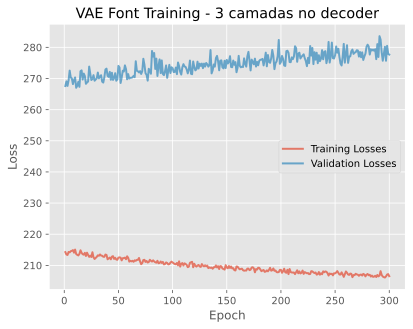

In [ ]:
train_losses=np.loadtxt('../content/models/training_losses_Z_32_3camadas_decoder.txt')
val_losses=np.loadtxt('../content/models/validation_losses_Z_32_3camadas_decoder.txt')
plt.plot(
    range(1,len(train_losses)+1),
    train_losses,
    label='Training Losses',
    linewidth=2,
    alpha=0.7
)
plt.plot(
    range(1,len(val_losses)+1),
    val_losses,
    label='Validation Losses',
    linewidth=2,
    alpha=0.7
)

plt.title('VAE Font Training - 3 camadas no decoder')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
pass

In [ ]:
model.load_state_dict(
    torch.load('../content/models/epoch_300_Z_64.model',
               map_location=torch.device('cpu')))

sample_latent_space('a')

In [ ]:
# Zipa os resultados para download
!zip -r results.zip ../content/results
!zip -r models.zip ../content/models

In [ ]:
# Baixa arquivos para o pc local
from google.colab import files
files.download('/content/models.zip')
files.download('/content/results.zip')

#Experimentos



* Tamanho da dimensão Z:

  O primeiro parâmetro que foi alterado foi a dimensão do espaço latente (Z), segundo aprendido em sala de aula pertubações neste parâmetro podem causar efeitos no resultado da função de perda.
  Primeiramente aumentou-se o Z de 32 para 64 e 128. Os gráficos abaixo mostraram que não houve mudanças na função de perda.   Em seguida, reduziu-se o Z para 16 como é mostrado, como pode-se observar que não houveram muitas mudanças, inclusive houve um aumento da perda de validação.

  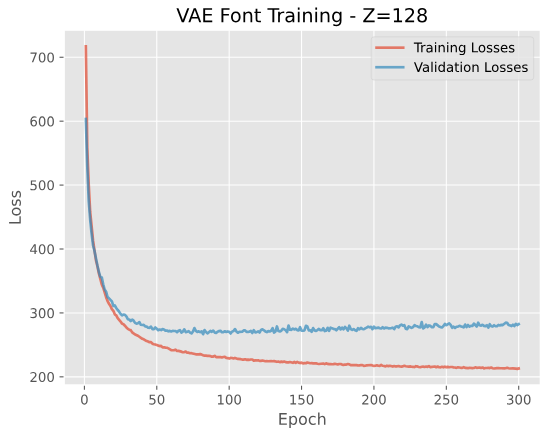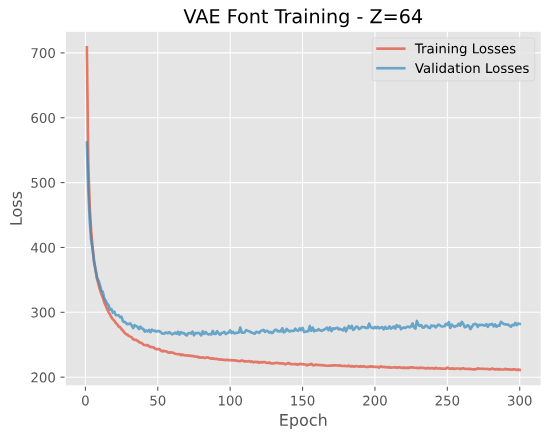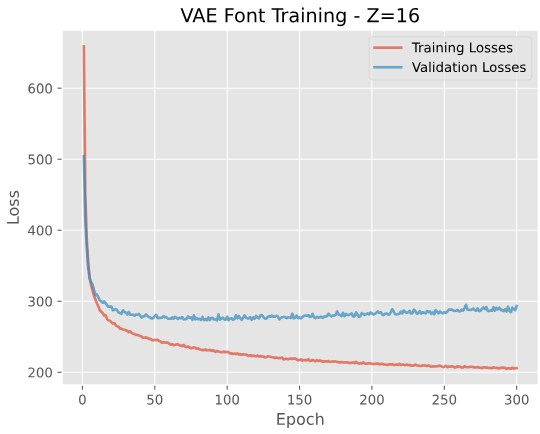

   * Número de épocas:

  Como pode ser observado  na figura original, parece haver uma leve inclinação na curva de 'Training Losses' que sugere que em mais épocas ela pode tender a zero, por isso o teste com Z=32 originalmente foi feito para 1000 épocas e o resultado pode ser visto a seguir.  Ao analisá-lo cheguei a conclusão que não valia a pena continuar a simulação, pois o ganho era muito pouco para o custo muito alto. Observe que na época 815 a perda de treinamento havia reduzido uma pouco para 201,27 mas  a perda de validação ainda estava na ordem dos 300 e pouco.


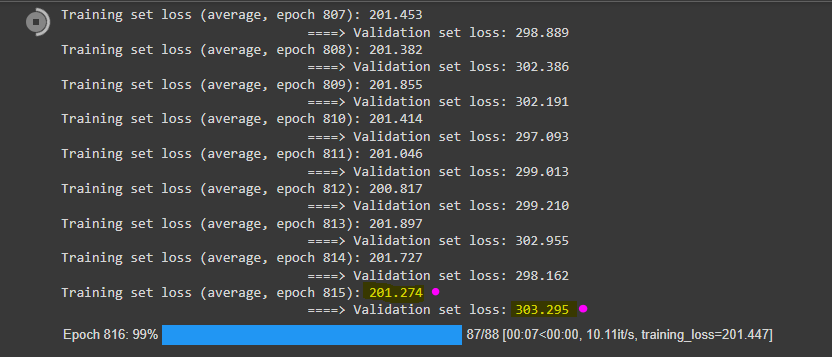




* Número de camadas:

  Foi adicionada mais uma camada linear no decoder com dimensão (32,1000), o intuito era deixar o decoder igual ao encoder e ter uma arquitera como um funil duplo. Porém o resultado não foi satisfatório, e houve muita divergência na Loss function.

  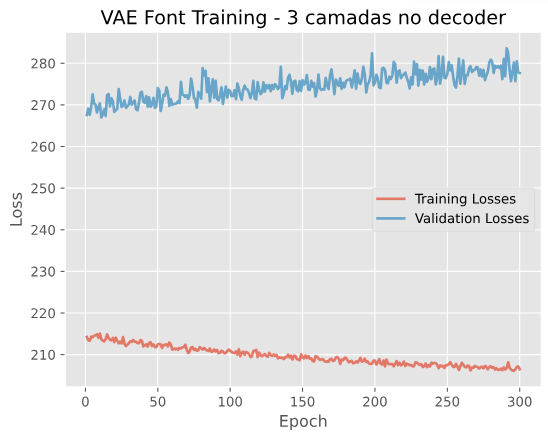

# Conclusões

A versão original do código as perdas ainda não estão muito boas, após estes testes breves chegou-se  a conclusão que é preciso mais testes variando outros hiperparâmetros como as funções de ativação. Porém fica-se limitado ao poder de processamento do hardware, fato que  foi amenizado pelo uso do Colab e que mesmo assim também possui suas limitações.